# Autonomous Robot Data Analysis

### Steps:
#### 1. General:

(a) Prepare Problem - Load required libraries and training dataset

(b) Summarize Data - Perform Descriptive Statistics and Data Visualization (uni- and multimodal)

(c) Prepare Data - Perform Feature Selection

#### 2. Clustering Analysis:
(a) Evaluate Algorithms - Select optimal K, evaluate algorithm peformance and compare clustering results

(b) Evaluate Validation Dataset - Check clustering algorithm on validation dataset

(c) Get Lap Timings - Derive lap timings from selected clustering algorithm results

(d) Evaluate Test Dataset - Check clustering algorithm on test dataset

#### 3. Time Series Analysis:
(a) Perform Time Series Analysis - Analyze lap timings using time series analysis

#### 4. Classification Analysis:
(a) Perform Classification - Perform classification analysis

## 1. General

### (a) Prepare Problem
#### (i) Load Required Libraries

In [1]:
import numpy as np
import pandas as pd
import sys
import warnings
import math
from pandas import set_option
from matplotlib import pyplot
from pandas.plotting import scatter_matrix

# Suppress Warning Messages and disable auto-scrolling for output
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}   

<IPython.core.display.Javascript object>

#### (ii) Load Dataset

In [3]:
# Load dataset

# Lap Run 1 (Counterclockwise Lap Run - normal) dataset Loading
df_LR1 = pd.read_csv('DataSet/LOG_0004.CSV', sep=';')
df_LR1 = df_LR1.iloc[:, :-1]
# get column names of df_LR1
names_LR1 = list(df_LR1)

### (b) Summarize Data

#### (i) Descriptive Statistics

In [4]:
# types
print(df_LR1.dtypes)

 unit--timestamp[ms]     int64
bma280_x[mg]             int64
bma280_y[mg]             int64
bma280_z[mg]             int64
bmg160_x[mDeg]           int64
bmg160_y[mDeg]           int64
bmg160_z[mDeg]           int64
bmi160_a_x[mg]           int64
bmi160_a_y[mg]           int64
bmi160_a_z[mg]           int64
bmi160_g_x[mDeg]         int64
bmi160_g_y[mDeg]         int64
bmi160_g_z[mDeg]         int64
bmm150_x[microT]         int64
bmm150_y[microT]         int64
bmm150_z[microT]         int64
bmm150_res               int64
bme280_temp[mDeg]        int64
bme280_press[Pa]         int64
bme280_hum[rh]           int64
max44009_bright[mLux]    int64
dtype: object


In [5]:
# shape
print(df_LR1.shape)

(3731, 21)


In [6]:
# head
with pd.option_context('display.max_rows', -1, 'display.max_columns', 3):
    print(df_LR1.head())

..                   ...          ...                              ...
     unit--timestamp[ms]          ...            max44009_bright[mLux]
0                  75000          ...                            60840
1                  75200          ...                            60480
2                  75400          ...                            60480
3                  75600          ...                            60480
1                  75200          ...                            60480
2                  75400          ...                            60480
3                  75600          ...                            60480
4                  75800          ...                            60840

[5 rows x 21 columns]


In [7]:
# descriptions
df_LR1.describe()

,unit--timestamp[ms],bma280_x[mg],bma280_y[mg],bma280_z[mg],bmg160_x[mDeg],bmg160_y[mDeg],bmg160_z[mDeg],bmi160_a_x[mg],bmi160_a_y[mg],bmi160_a_z[mg],...,bmi160_g_y[mDeg],bmi160_g_z[mDeg],bmm150_x[microT],bmm150_y[microT],bmm150_z[microT],bmm150_res,bme280_temp[mDeg],bme280_press[Pa],bme280_hum[rh],max44009_bright[mLux]
count,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,...,3731.000000,3731.000000,3731.00000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000
mean,448000.000000,-2.813991,145.190029,1053.810239,73.581614,-955.635486,-4785.594479,-52.012865,116.389172,1050.623961,...,-449.128652,-4619.265076,-60.87242,9.263468,25.889574,6106.113374,33850.737068,100844.167783,30.462343,138480.450281
std,215438.251014,47.340609,34.255671,45.746134,958.796757,1691.458598,8792.355821,48.357359,23.275417,36.080389,...,1723.503035,8828.281706,38.13362,50.290539,37.558407,16.947886,432.906281,3.670072,0.815312,68345.367231
min,75000.000000,-673.000000,-166.000000,222.000000,-7385.000000,-20812.000000,-27587.000000,-681.000000,-128.000000,382.000000,...,-21667.000000,-28686.000000,-157.00000,-94.000000,-58.000000,6073.000000,33140.000000,100835.000000,29.000000,34740.000000
25%,261500.000000,-9.000000,126.000000,1039.000000,-305.000000,-1892.000000,-11077.500000,-67.000000,106.000000,1039.000000,...,-1342.000000,-10925.000000,-87.00000,-21.000000,0.000000,6092.000000,33510.000000,100841.000000,30.000000,88200.000000
50%,448000.000000,1.000000,146.000000,1054.000000,61.000000,-732.000000,-976.000000,-52.000000,118.000000,1051.000000,...,-244.000000,-793.000000,-62.00000,4.000000,23.000000,6108.000000,33790.000000,100845.000000,31.000000,115920.000000
75%,634500.000000,5.000000,164.000000,1070.000000,427.000000,-183.000000,244.000000,-37.000000,128.000000,1063.000000,...,305.000000,427.000000,-38.00000,51.000000,57.000000,6120.000000,34200.000000,100847.000000,31.000000,173880.000000
max,821000.000000,845.000000,605.000000,1753.000000,32409.000000,21728.000000,21789.000000,853.000000,255.000000,1508.000000,...,20935.000000,22033.000000,23.00000,89.000000,107.000000,6137.000000,34630.000000,100853.000000,32.000000,345600.000000


In [8]:
# correlation
corr_matrix = df_LR1.corr().abs()

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

def get_bottom_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]

print("Top Absolute Correlations")
print('')
print(get_top_abs_correlations(df_LR1, 15))
print('')
print("Bottom Absolute Correlations")
print('')
print(get_bottom_abs_correlations(df_LR1, 15))

Top Absolute Correlations

bmg160_z[mDeg]        bmi160_g_z[mDeg]     0.999809
bmm150_res            bme280_temp[mDeg]    0.997901
 unit--timestamp[ms]  bme280_temp[mDeg]    0.993784
                      bmm150_res           0.992875
bmg160_y[mDeg]        bmi160_g_y[mDeg]     0.988182
bme280_temp[mDeg]     bme280_hum[rh]       0.921310
bmm150_res            bme280_hum[rh]       0.919751
bmg160_x[mDeg]        bmi160_g_x[mDeg]     0.918808
 unit--timestamp[ms]  bme280_hum[rh]       0.912041
bma280_x[mg]          bmi160_a_x[mg]       0.743135
 unit--timestamp[ms]  bme280_press[Pa]     0.718520
bme280_press[Pa]      bme280_hum[rh]       0.692545
bmm150_res            bme280_press[Pa]     0.680035
bme280_temp[mDeg]     bme280_press[Pa]     0.678398
bmg160_y[mDeg]        bmi160_g_z[mDeg]     0.644970
dtype: float64

Bottom Absolute Correlations

bmg160_x[mDeg]        bmm150_z[microT]     0.000002
bmg160_z[mDeg]        bmi160_a_z[mg]       0.000344
bmi160_a_z[mg]        bmi160_g_z[mDeg]     

Based on the result above, the following can be observed:

1. Columns "bmi160_a_x[mg]" and "bmi160_a_z[mg]" have high correlation with "bma280_x[mg]" and "bma280_z[mg]". 
    Thus, columns "bma280_x[mg]" and "bma280_z[mg]" will be dropped.
2. Columns "bmg160_x[mDeg]", "bmg160_y[mDeg]" and "bmg160_z[mDeg]" are highly correlated with "bmi160_g_x[mDeg]", 
    "bmi160_g_y[mDeg]" and "bmi160_g_z[mDeg]" respectively. Thus, "bmg160_x[mDeg]", "bmg160_y[mDeg]" and "bmg160_z[mDeg]" will
    be dropped.

#### (ii) Data Visualizations

##### (1) Unimodal Data Visualization

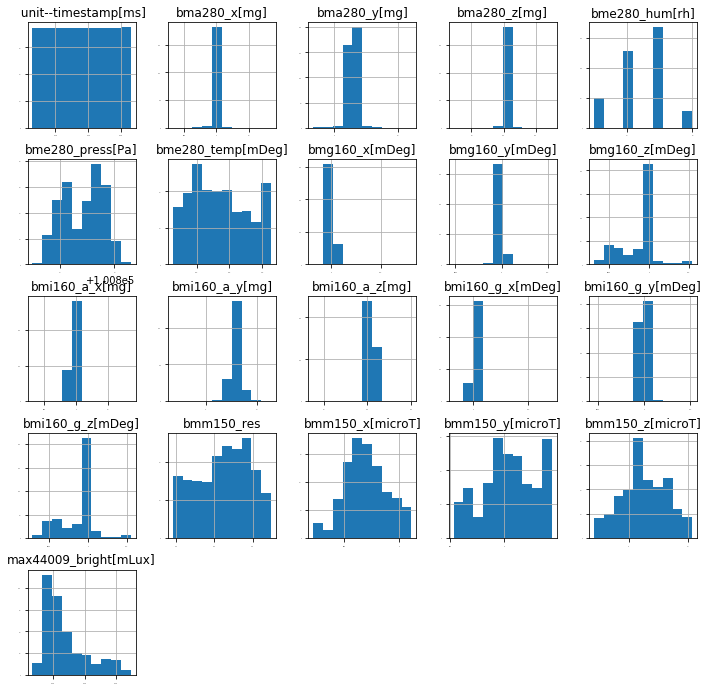

In [9]:
pyplot.rcParams['figure.figsize'] = [12, 12]
# histograms
df_LR1.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

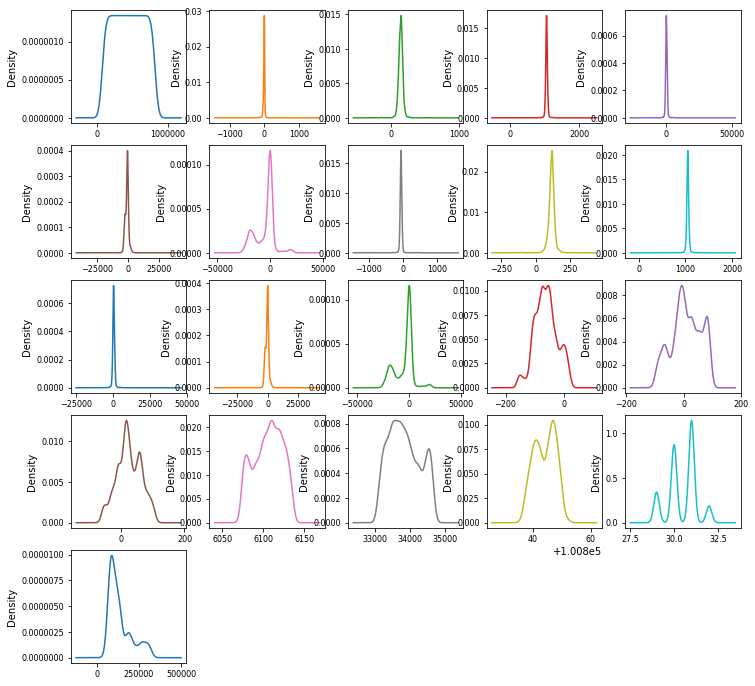

In [10]:
# density
df_LR1.plot(kind='density', subplots=True, layout=(5,5), sharex=False, sharey=False, legend=False, fontsize=8)
pyplot.show()

 unit--timestamp[ms]        AxesSubplot(0.125,0.749828;0.133621x0.130172)
bma280_x[mg]             AxesSubplot(0.285345,0.749828;0.133621x0.130172)
bma280_y[mg]              AxesSubplot(0.44569,0.749828;0.133621x0.130172)
bma280_z[mg]             AxesSubplot(0.606034,0.749828;0.133621x0.130172)
bmg160_x[mDeg]           AxesSubplot(0.766379,0.749828;0.133621x0.130172)
bmg160_y[mDeg]              AxesSubplot(0.125,0.593621;0.133621x0.130172)
bmg160_z[mDeg]           AxesSubplot(0.285345,0.593621;0.133621x0.130172)
bmi160_a_x[mg]            AxesSubplot(0.44569,0.593621;0.133621x0.130172)
bmi160_a_y[mg]           AxesSubplot(0.606034,0.593621;0.133621x0.130172)
bmi160_a_z[mg]           AxesSubplot(0.766379,0.593621;0.133621x0.130172)
bmi160_g_x[mDeg]            AxesSubplot(0.125,0.437414;0.133621x0.130172)
bmi160_g_y[mDeg]         AxesSubplot(0.285345,0.437414;0.133621x0.130172)
bmi160_g_z[mDeg]          AxesSubplot(0.44569,0.437414;0.133621x0.130172)
bmm150_x[microT]         AxesSubplot(0

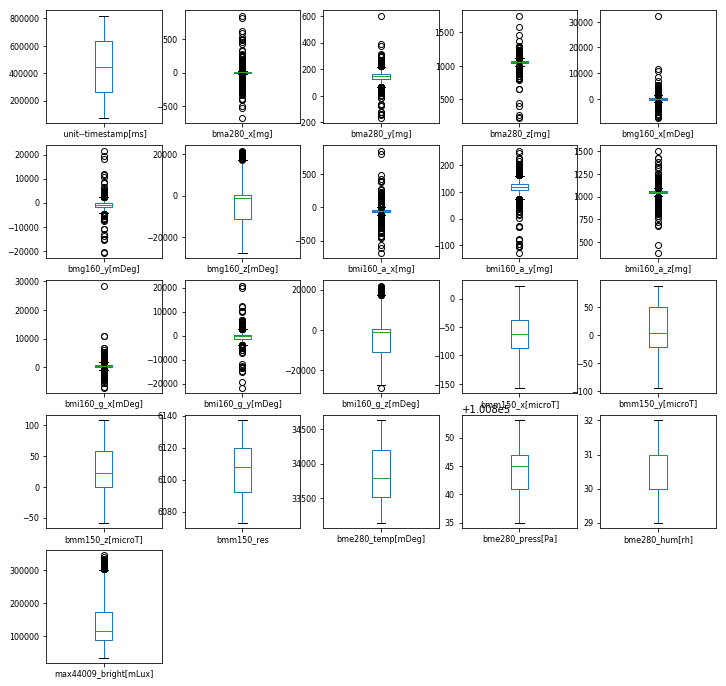

In [11]:
#box and whisker plots
df_LR1.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False, fontsize=8)

##### (2) Multimodal Data Visualizations

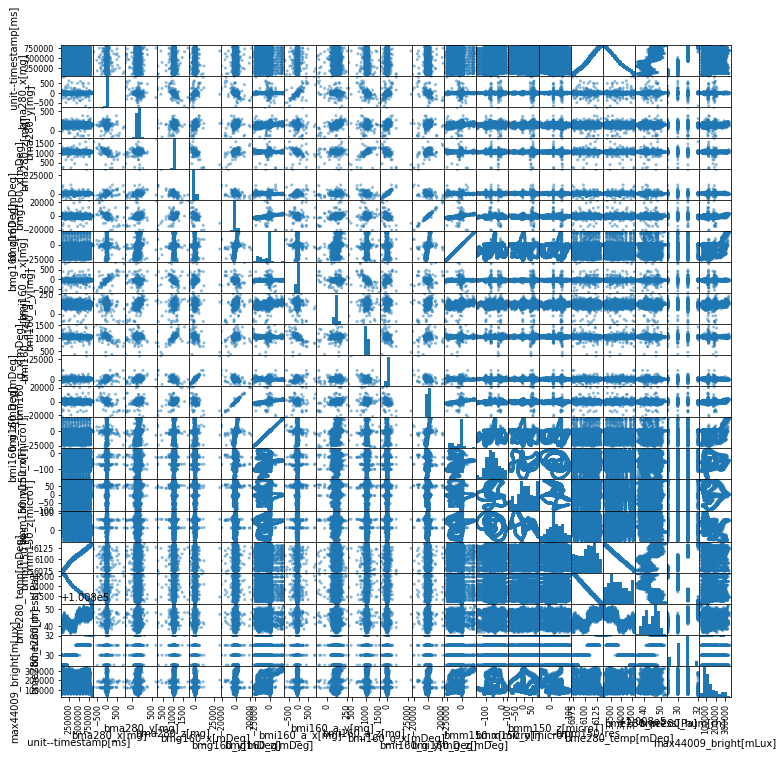

In [12]:
# scatter plot matrix
scatter_matrix(df_LR1)
pyplot.show()

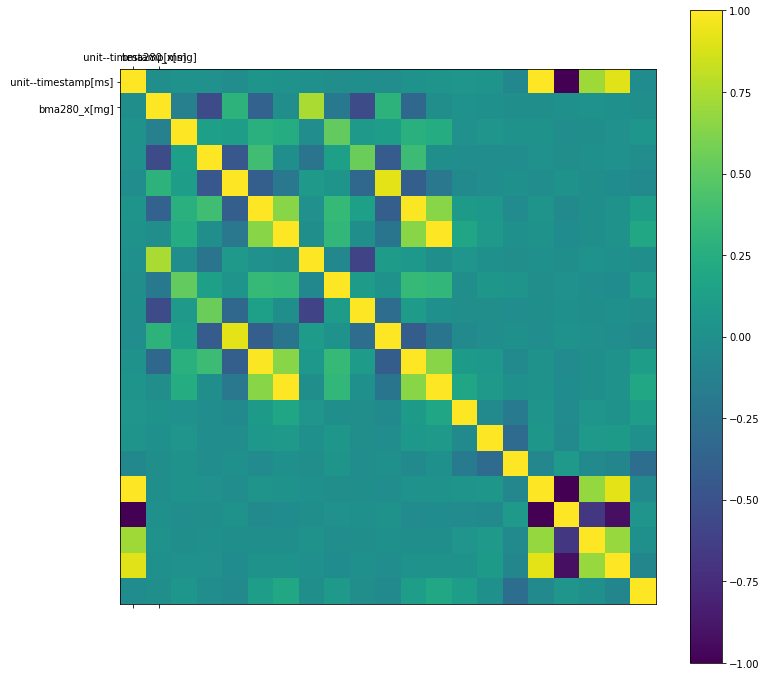

In [13]:
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow( df_LR1.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,2,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names_LR1)
ax.set_yticklabels(names_LR1)
pyplot.show()

### (c) Prepare Data

#### (i) Feature Selection

## 2. Clustering Analysis

### (a) Evaluate Algorithms

#### (i) Select Optimal K for Clustering

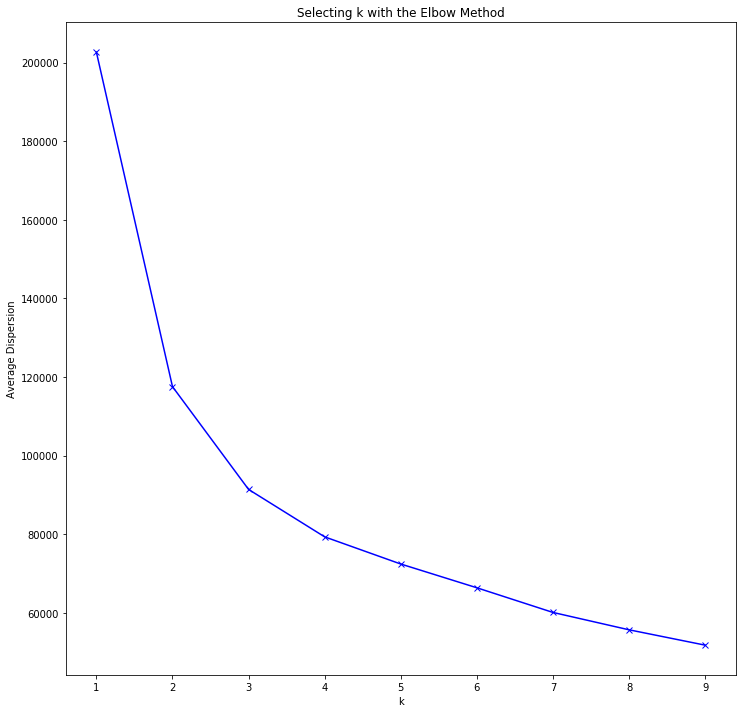

In [14]:
from sklearn.cluster import KMeans 
from scipy.spatial.distance import cdist 
from sklearn import metrics
import matplotlib.pyplot as plt
X = df_LR1[:]
K = range(1, 10) 
meanDispersions = [] 
for k in K: 
    kmeans = KMeans(n_clusters=k) 
    kmeans.fit(X) 
    meanDispersions.append(sum(np.min(cdist(X,kmeans.cluster_centers_,'euclidean'),axis=1))/X.shape[0])
plt.plot(K, meanDispersions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average Dispersion') 
plt.title('Selecting k with the Elbow Method') 
plt.show()

From the curve above, the optimal point where the average disperson declines least rapidly to determine the K value is 4.

#### (ii) Evaluate Algorithm Performance

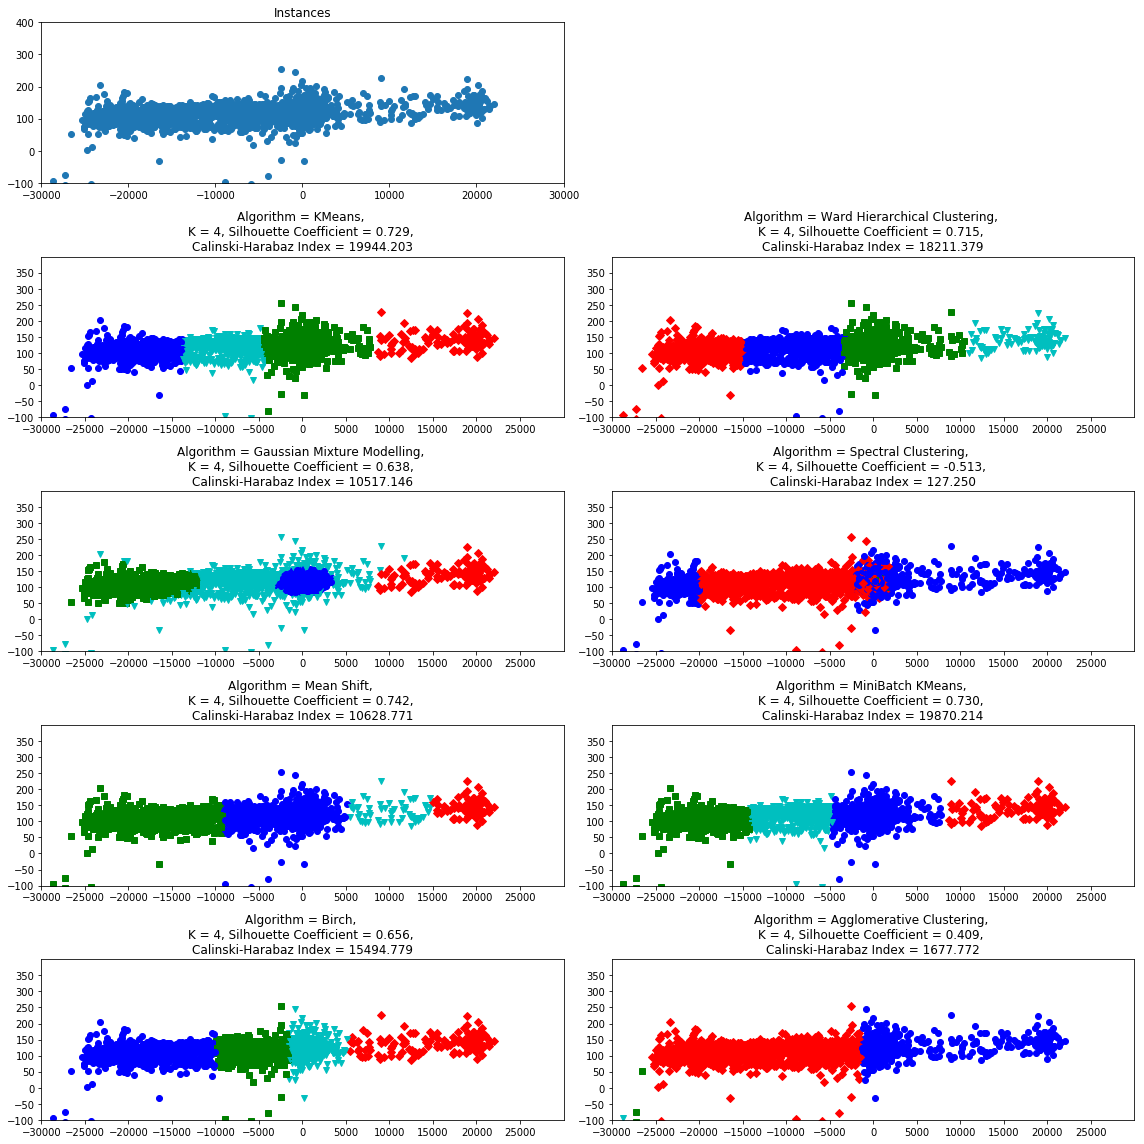

In [15]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering 
from sklearn.cluster import MeanShift 
from sklearn.cluster import estimate_bandwidth 
from sklearn.cluster import MiniBatchKMeans 
from sklearn.cluster import Birch
from sklearn import metrics
import matplotlib.pyplot as plt

t = 4

X_features = df_LR1[['bmi160_g_z[mDeg]','bmi160_a_y[mg]']]
x1 = df_LR1["bmi160_g_z[mDeg]"].values
x2 = df_LR1["bmi160_a_y[mg]"].values

# connectivity matrix for structured Ward
connectivity = kneighbors_graph(X_features, n_neighbors=10, include_self=False)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)

fig = plt.figure(figsize=(16,16))

plt.subplot(5, 2, 1)
plt.xlim([-30000, 30000])
plt.ylim([-100, 400])
plt.title('Instances')
plt.scatter(x1, x2)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+']

Kclasses_KMeans = []
classifiers = {'KMeans' : KMeans(n_clusters=t),
           'Ward Hierarchical Clustering' : AgglomerativeClustering(n_clusters=t, affinity = 'euclidean', linkage = 'ward', connectivity=connectivity), 
           'Gaussian Mixture Modelling' : GaussianMixture(n_components=t,init_params='kmeans'),
           'Spectral Clustering' : SpectralClustering(n_clusters=t, eigen_solver='arpack',affinity="nearest_neighbors"),
           'Mean Shift' : MeanShift(bandwidth=estimate_bandwidth(X_features, quantile=0.3), bin_seeding=True),
           'MiniBatch KMeans' : MiniBatchKMeans(n_clusters=t),
           'Birch' : Birch(n_clusters=t),
           'Agglomerative Clustering' :  AgglomerativeClustering(linkage="average", affinity="cityblock",n_clusters=t, connectivity=connectivity) 
          }

Kclass = []
Kclasses = []

subplot_counter = 2
for i, (name, algo) in enumerate(classifiers.items()):
    subplot_counter += 1
    plt.subplot(5, 2, subplot_counter)
    Kclass = []
    model = algo
    if((name == 'Ward Hierarchical Clustering') or (name == 'Agglomerative Clustering')):
        clust_labels = model.fit_predict(X_features)
    elif(name == 'Gaussian Mixture Modelling'):
        model.fit(X_features) 
        clust_labels = model.predict(X_features)
    else: 
        model.fit(X_features)
        clust_labels = model.labels_
       
    for i, l in enumerate(clust_labels):
        Kclass.append(l)
        plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l], ls='None') 
    Kclasses.append(Kclass)
    plt.xlim([-30000, 30000])
    plt.ylim([-100, 400])
    plt.xticks(np.arange(-30000, 30000, 5000))
    plt.yticks(np.arange(-100, 400, 50))
    plt.title('Algorithm = %s, \nK = %s, Silhouette Coefficient = %.03f, \nCalinski-Harabaz Index = %.03f' % (
        name, t, metrics.silhouette_score(X_features, clust_labels, metric='euclidean'), metrics.calinski_harabaz_score(X_features, clust_labels)))
    #plt.title('K = %s, Silhouette Coefficient = %.03f' % (
    #    t, metrics.silhouette_score(X_features, clust_labels, metric='euclidean')))
    plt.tight_layout()
plt.show()

#### (iii) Compare Clustering Results

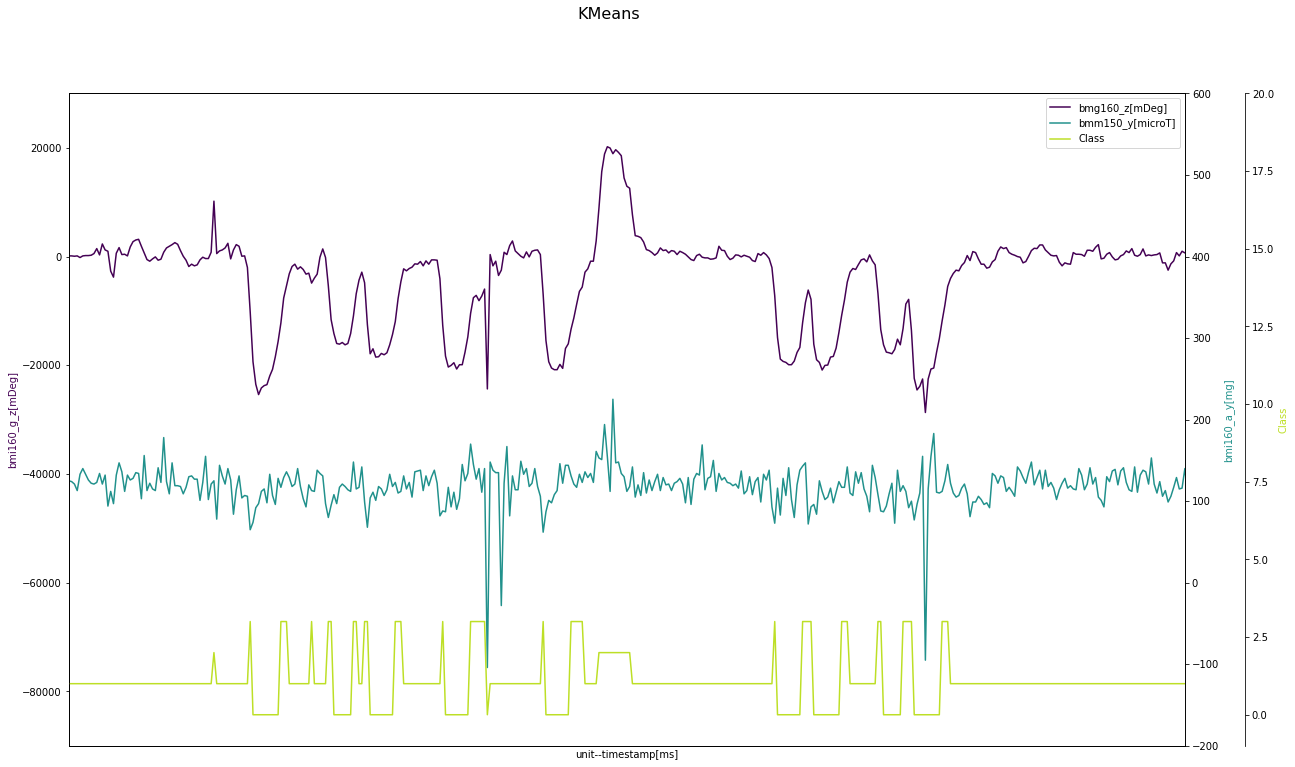

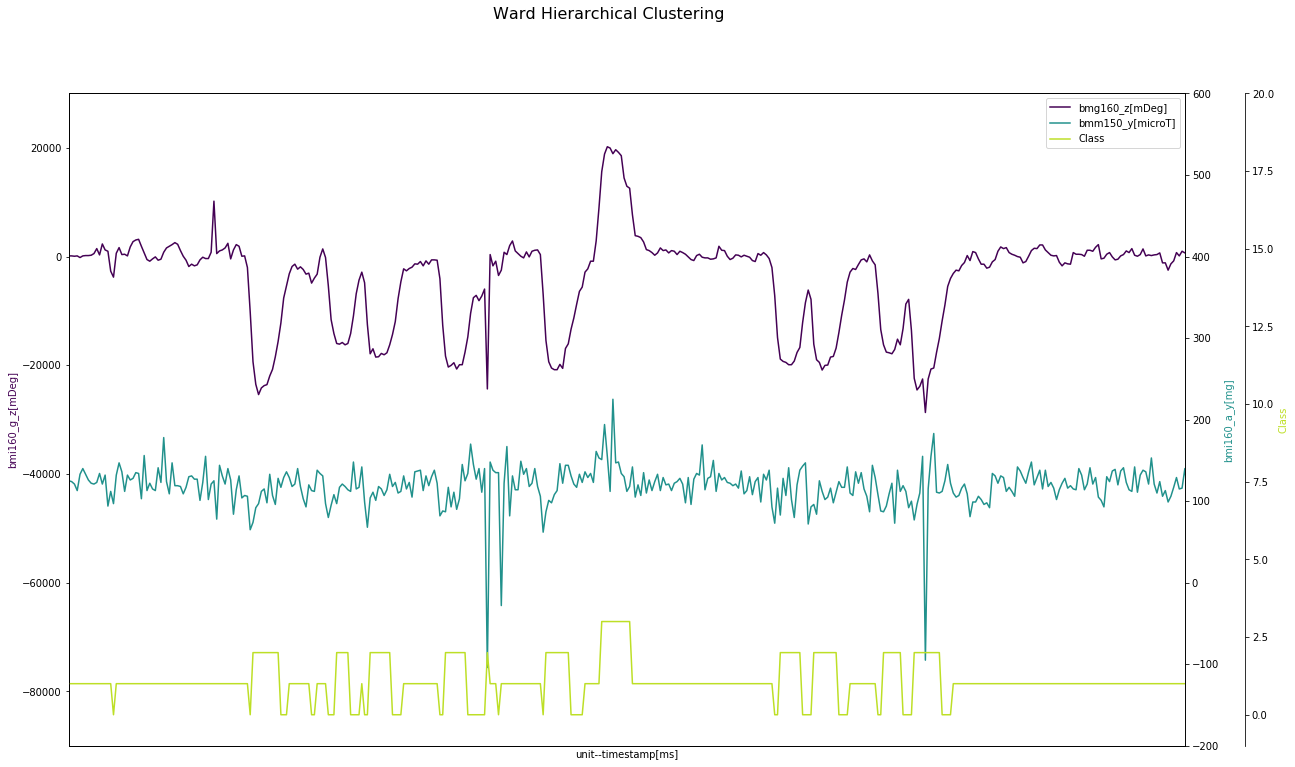

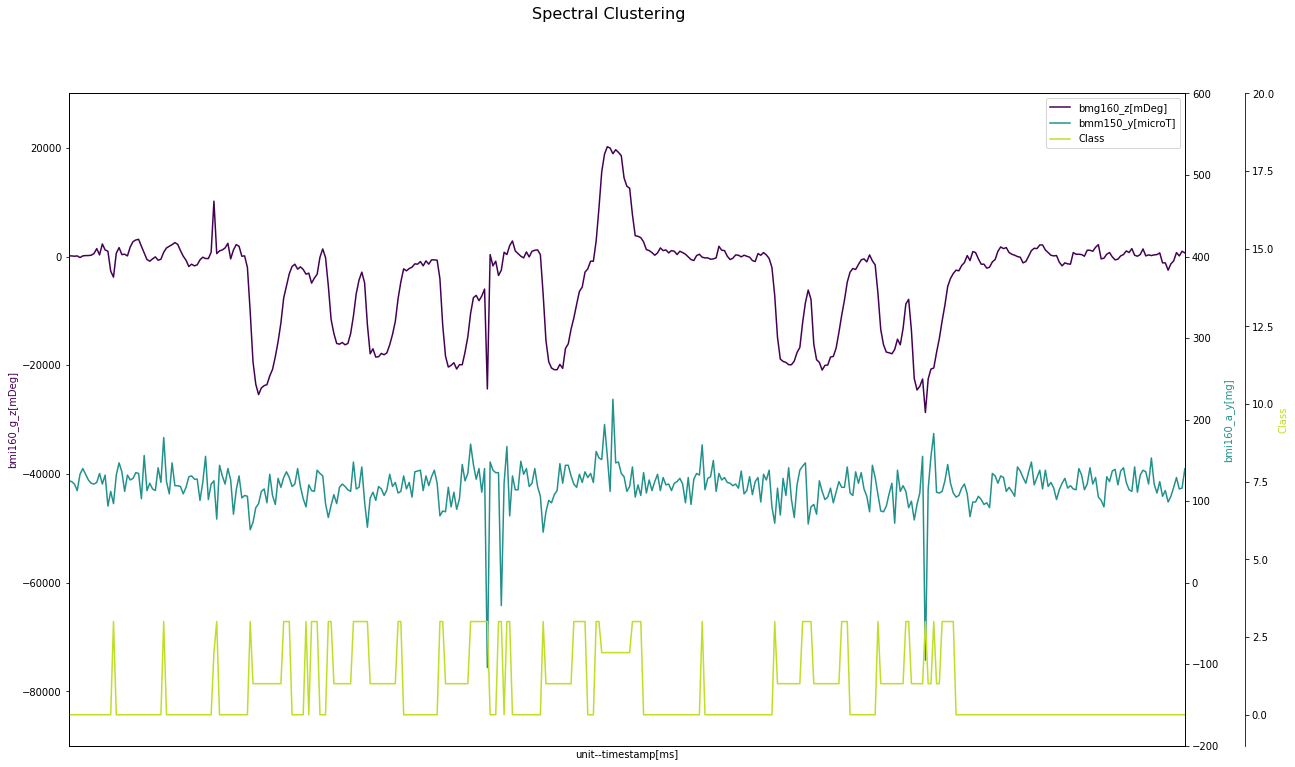

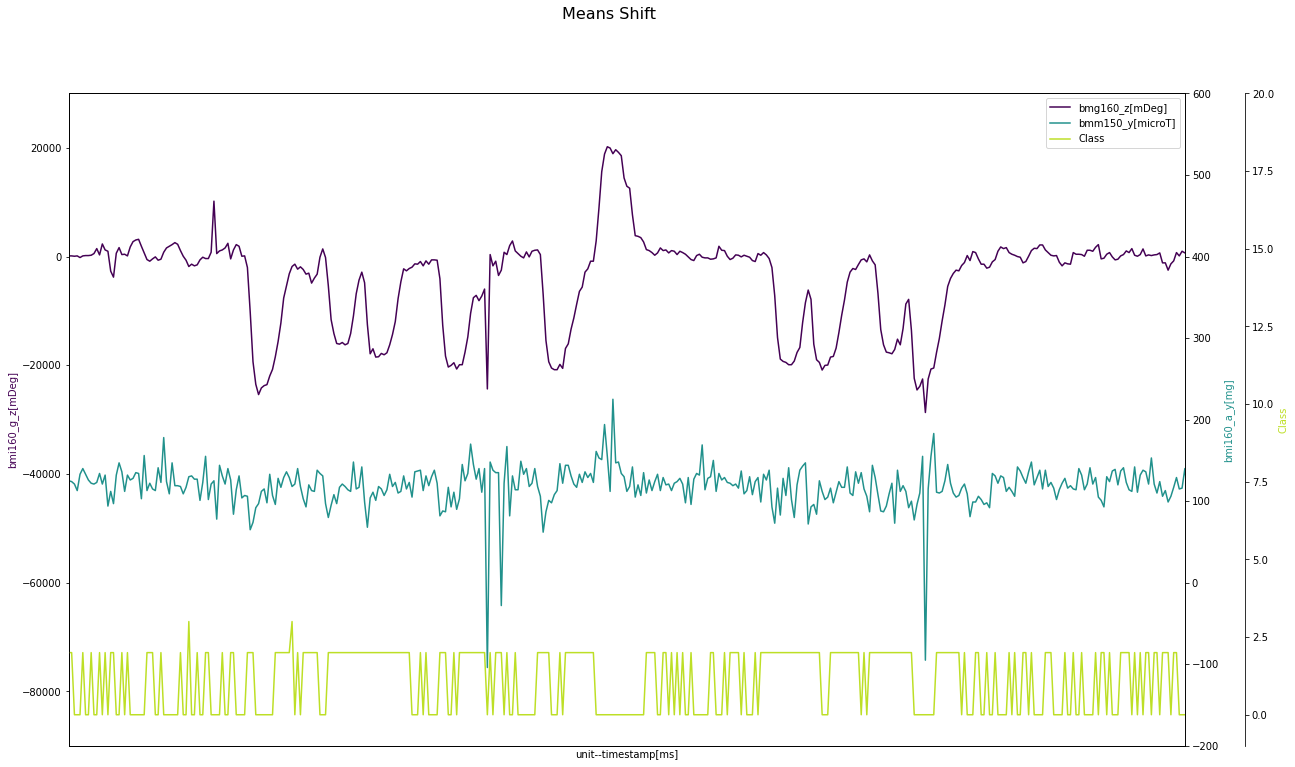

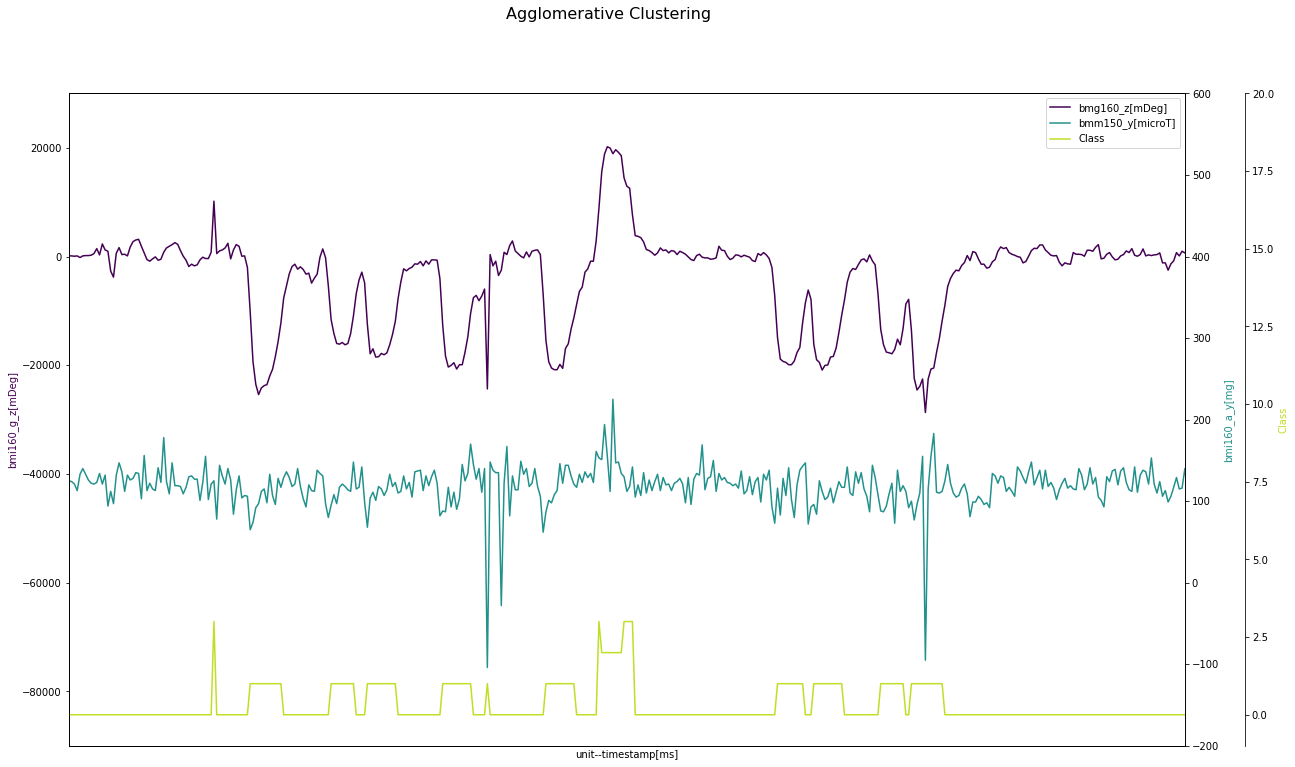

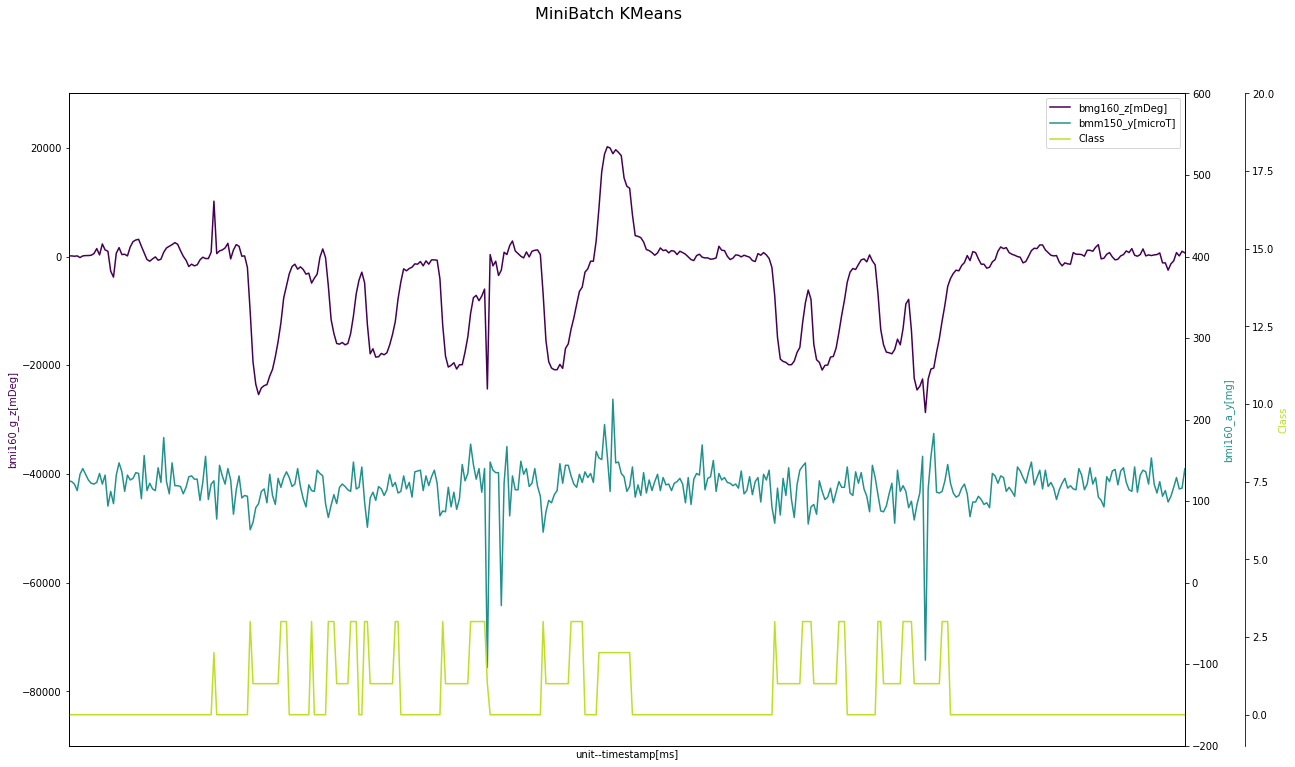

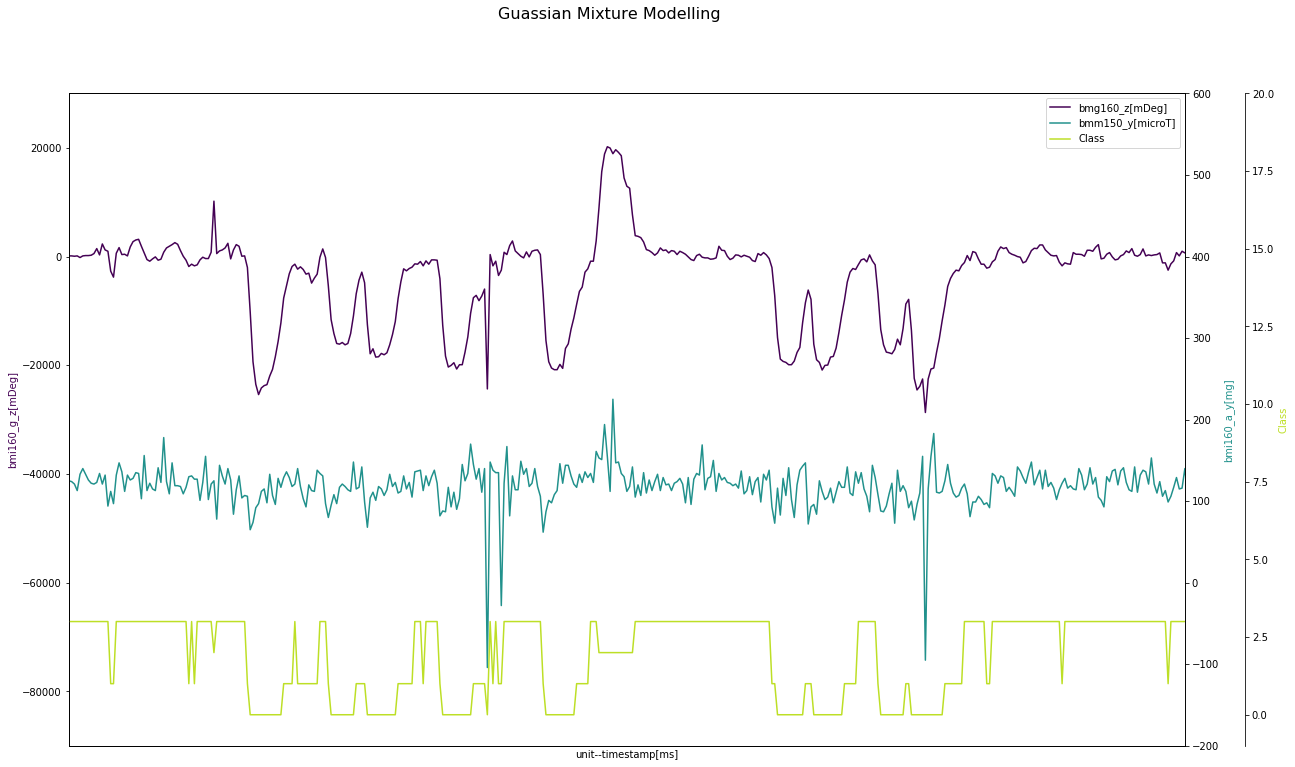

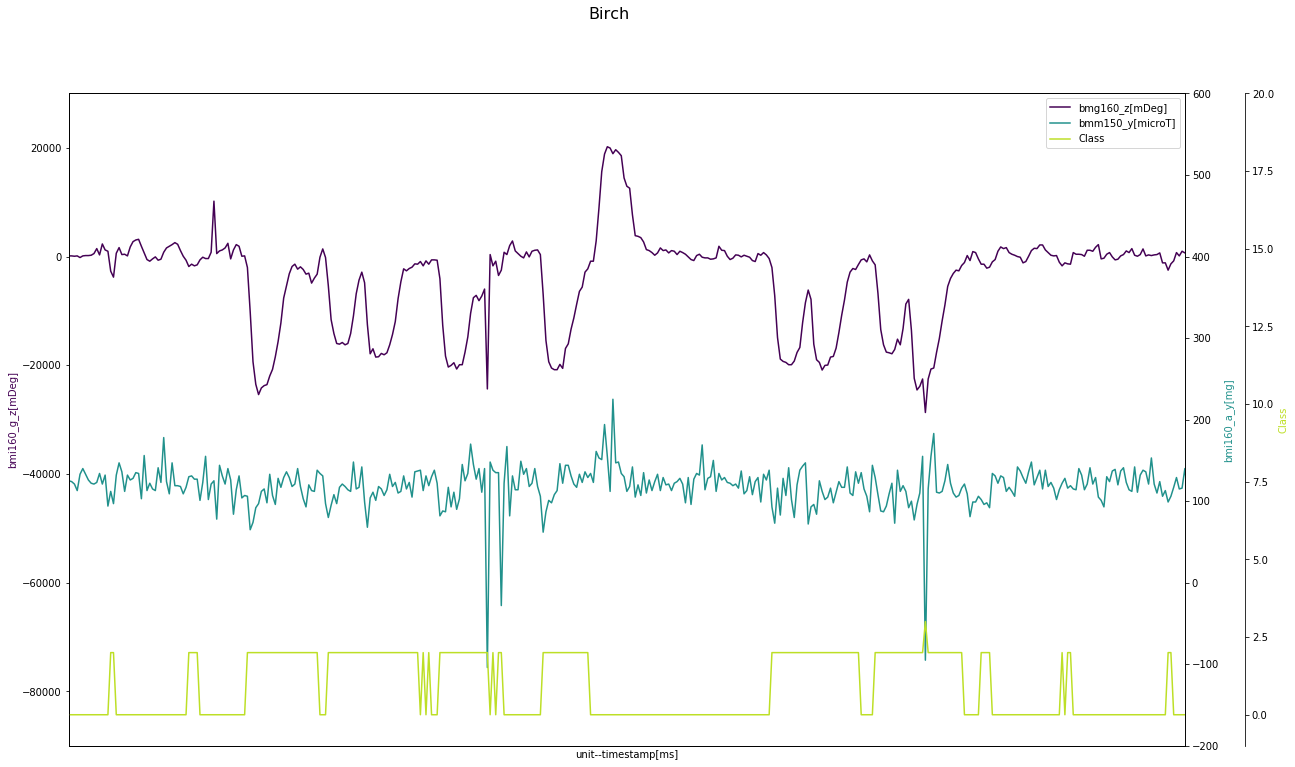

In [16]:
import matplotlib.pyplot as plt 

KClasses_Name = ["KMeans", "Ward Hierarchical Clustering", "Spectral Clustering", "Means Shift", "Agglomerative Clustering", 
                 "MiniBatch KMeans", "Guassian Mixture Modelling", "Birch"]

for i, KClasses_i in enumerate(Kclasses):
    se = pd.Series(KClasses_i)
    df_LR1['Class'] = se.values

    x3 = df_LR1["Class"].values
    x4 = df_LR1[" unit--timestamp[ms]"].values

    fig = plt.figure(figsize=(20,12))
    host = fig.add_subplot(111)

    plt.suptitle(KClasses_Name[i], fontsize=16)

    par1 = host.twinx()
    par2 = host.twinx()

    host.set_xlim(75000, 155000)
    host.set_ylim(-90000, 30000)
    par1.set_ylim(-200, 600)
    par2.set_ylim(-1, 20)

    host.set_xlabel("unit--timestamp[ms]")
    host.set_ylabel("bmi160_g_z[mDeg]")
    par1.set_ylabel("bmi160_a_y[mg]")
    par2.set_ylabel("Class")

    color1 = plt.cm.viridis(0)
    color2 = plt.cm.viridis(0.5)
    color3 = plt.cm.viridis(.9)

    p1, = host.plot(x4, x1, color=color1,label="bmg160_z[mDeg]")
    p2, = par1.plot(x4, x2, color=color2, label="bmm150_y[microT]")
    p3, = par2.plot(x4, x3, color=color3, label="Class")

    lns = [p1, p2, p3]
    host.legend(handles=lns, loc='best')

    # right, left, top, bottom
    par2.spines['right'].set_position(('outward', 60))      
    # no x-ticks                 
    par2.xaxis.set_ticks([])
    # Sometimes handy, same for xaxis
    #par2.yaxis.set_ticks_position('right')

    host.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())
    par2.yaxis.label.set_color(p3.get_color())

## 5. Get Lap Timings

In [17]:
# Select Wward Hierarchical Clustering result labels.
se = pd.Series(Kclasses[1])
if 'Class' in df_LR1.columns: df_LR1.drop('Class', axis=1)
df_LR1['Class'] = se.values

ls1 = df_LR1.loc[df_LR1['Class'] == 3].index.tolist()

ls2 = df_LR1.loc[df_LR1['Class'] == 2].index.tolist()

ls = sorted(ls1 + ls2)
#print(ls)

listClasses= []
for i, value in enumerate(ls):
    if(i != len(ls) - 1):
        if(value != ls[i-1] + 1):
            if(ls[i+1] == value + 1):
                listClasses.append(value)

segment_timings_tmp = [(x - listClasses[i-1])*0.2 if i else None for i, x in enumerate(listClasses)][1:]
segment_timings_LR1 = ["{:.2f}".format(value) for value in segment_timings_tmp]

segment_timings_label_tmp = ["L" + str(loop) + "S" + str(segment) for loop in range(1,math.ceil(len(segment_timings_LR1)/10)) for segment in range(1,11)]
segment_timings_label = segment_timings_label_tmp[0:len(segment_timings_LR1)]

loop_timings_tmp = np.add.reduceat(segment_timings_tmp, np.arange(0, len(segment_timings_tmp), 10))
loop_timings_LR1 = ["{:.2f}".format(value) for value in loop_timings_tmp]

df_timings_LR1 = pd.DataFrame(list(zip(segment_timings_label, segment_timings_LR1)),
              columns=['Loop/Segment','Segment Timing'])

print(loop_timings_LR1)

df_LR1.to_csv("DataSet/LOG_0004_clustered.csv", sep=',')
df_timings_LR1.to_csv("DataSet/LOG_0004_timings.csv", sep=',')

['71.00', '71.00', '71.20', '71.60', '71.60', '72.20', '72.00', '72.40', '72.20', '48.00']


### (b) Evaluate Validation Dataset

#### (i) Load Dataset

In [18]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn import metrics
import matplotlib.pyplot as plt

# Load dataset

# Lap Run 2 (Counter-Clockwise Lap Run - with stops) dataset Loading
df_LR2 = pd.read_csv('DataSet/LOG_0005.CSV', sep=';')
df_LR2 = df_LR2.iloc[:, :-1]
# get column names of df_LR2
names_LR2 = list(df_LR2)

#### (ii) Evalute Clustering Performance

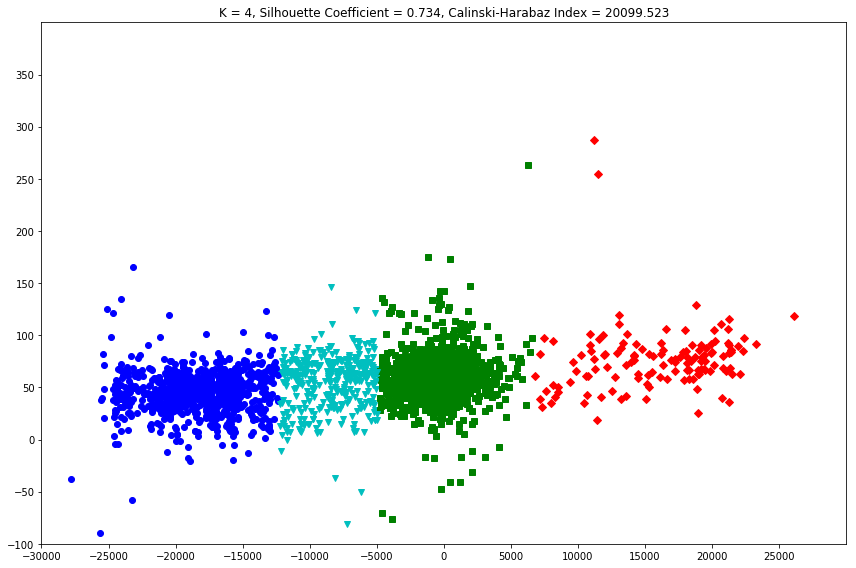

In [19]:
X_features = df_LR2[['bmi160_g_z[mDeg]','bmi160_a_y[mg]']]
x1 = df_LR2["bmi160_g_z[mDeg]"].values
x2 = df_LR2["bmi160_a_y[mg]"].values
Kclass_LR2 = []

fig = plt.figure(figsize=(12,8))
plt.subplot(4, 2, 1)
plt.xlim([-30000, 30000])
plt.ylim([-100, 400])
plt.title('Instances')
plt.scatter(x1, x2)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+']

# connectivity matrix for structured Ward
connectivity = kneighbors_graph(X_features, n_neighbors=10, include_self=False)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)
    
plt.subplot(111)
model = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward', connectivity=connectivity)
clust_labels = model.fit_predict(X_features)    

for i, l in enumerate(clust_labels):
    Kclass_LR2.append(l)
    plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l], ls='None') 
plt.xlim([-30000, 30000])
plt.ylim([-100, 400])
plt.xticks(np.arange(-30000, 30000, 5000))
plt.yticks(np.arange(-100, 400, 50))
plt.title('K = %s, Silhouette Coefficient = %.03f, Calinski-Harabaz Index = %.03f' % (
    t, metrics.silhouette_score(X_features, clust_labels, metric='euclidean'), metrics.calinski_harabaz_score(X_features, clust_labels)))
plt.tight_layout()
plt.show()

#### (iii) Display Clustering Results

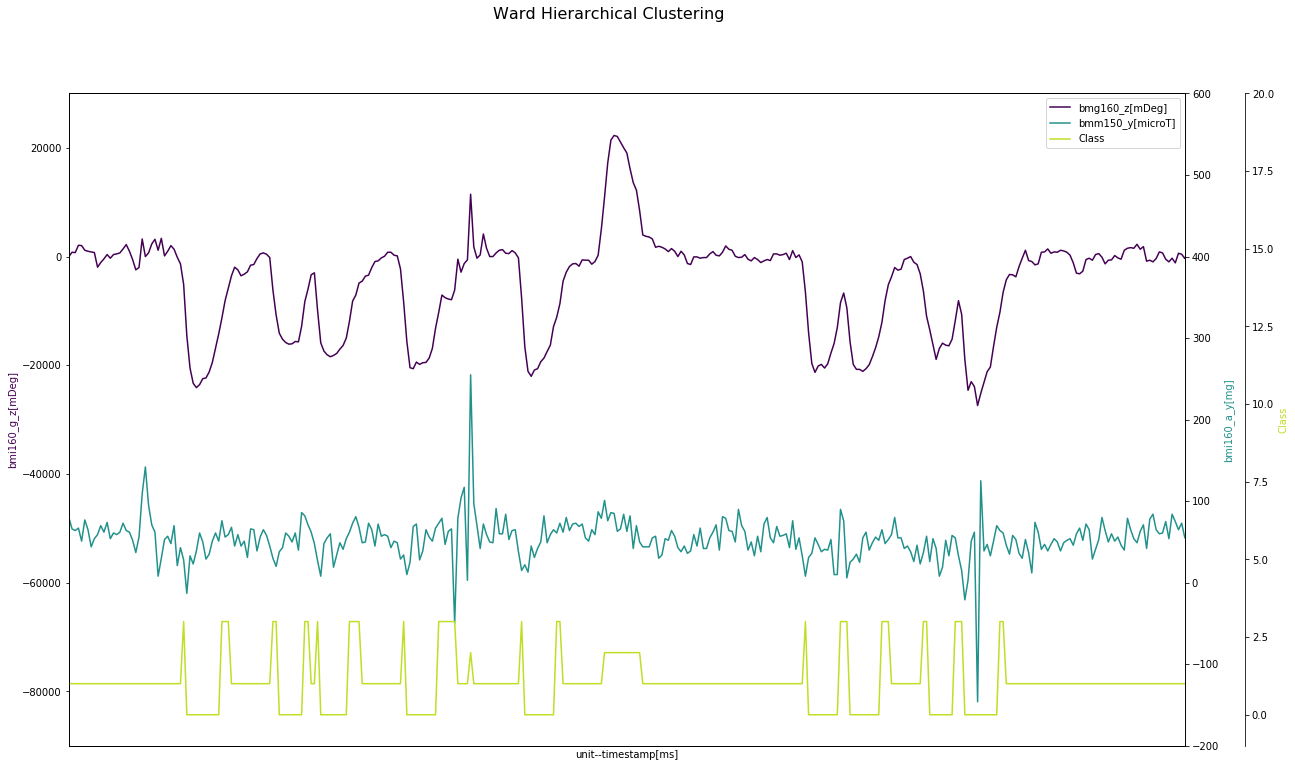

In [20]:
se = pd.Series(Kclass_LR2)
df_LR2['Class'] = se.values

x3 = df_LR2["Class"].values
x4 = df_LR2[" unit--timestamp[ms]"].values

fig = plt.figure(figsize=(20,12))
host = fig.add_subplot(111)

plt.suptitle("Ward Hierarchical Clustering", fontsize=16)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlim(135000, 205000)
host.set_ylim(-90000, 30000)
par1.set_ylim(-200, 600)
par2.set_ylim(-1, 20)

host.set_xlabel("unit--timestamp[ms]")
host.set_ylabel("bmi160_g_z[mDeg]")
par1.set_ylabel("bmi160_a_y[mg]")
par2.set_ylabel("Class")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(.9)

p1, = host.plot(x4, x1, color=color1,label="bmg160_z[mDeg]")
p2, = par1.plot(x4, x2, color=color2, label="bmm150_y[microT]")
p3, = par2.plot(x4, x3, color=color3, label="Class")

lns = [p1, p2, p3]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))      
# no x-ticks                 
par2.xaxis.set_ticks([])
# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

### (c) Get Lap Timings

In [21]:
se = pd.Series(Kclass_LR2)
if 'Class' in df_LR2.columns: df_LR2.drop('Class', axis=1)
df_LR2['Class'] = se.values

ls1 = df_LR2.loc[df_LR2['Class'] == 2].index.tolist()

ls2 = df_LR2.loc[df_LR2['Class'] == 0].index.tolist()

ls = sorted(ls1 + ls2)
#print(ls)

listClasses= []
for i, value in enumerate(ls):
    if(i != len(ls) - 1):
        if(value != ls[i-1] + 1):
            if(ls[i+1] == value + 1):
                listClasses.append(value)

segment_timings_tmp = [(x - listClasses[i-1])*0.2 if i else None for i, x in enumerate(listClasses)][1:]
segment_timings_LR2 = ["{:.2f}".format(value) for value in segment_timings_tmp]

segment_timings_label_tmp = ["L" + str(loop) + "S" + str(segment) for loop in range(1,math.ceil(len(segment_timings_LR2)/10)) for segment in range(1,11)]
segment_timings_label = segment_timings_label_tmp[0:len(segment_timings_LR2)]

loop_timings_tmp = np.add.reduceat(segment_timings_tmp, np.arange(0, len(segment_timings_tmp), 10))
loop_timings_LR2 = ["{:.2f}".format(value) for value in loop_timings_tmp]

df_timings_LR2 = pd.DataFrame(list(zip(segment_timings_label, segment_timings_LR2)),
              columns=['Loop/Segment','Segment Timing'])

print(loop_timings_LR2)

df_LR2.to_csv("DataSet/LOG_0005_clustered.csv", sep=',')
df_timings_LR2.to_csv("DataSet/LOG_0005_timings.csv", sep=',')

['77.40', '76.20', '78.40', '79.40', '78.60', '79.80', '82.80', '82.60', '82.80', '28.00']


### (d) Evaluate Additional Dataset

#### (i) Load Dataset

In [22]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn import metrics
import matplotlib.pyplot as plt

# Load dataset

# Lap Run 3 (Clockwise Lap Run) dataset Loading
df_LR3 = pd.read_csv('DataSet/LOG_0003.CSV', sep=';')
df_LR3 = df_LR3.iloc[:, :-1]
# get column names of df_LR3
names_LR2 = list(df_LR3)

#### (ii) Evalute Clustering Performance

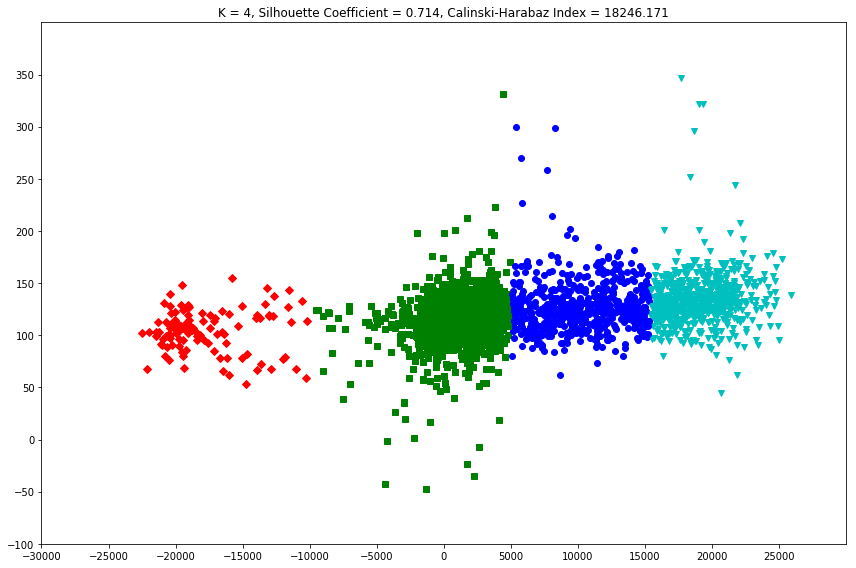

In [23]:
X_features = df_LR3[['bmi160_g_z[mDeg]','bmi160_a_y[mg]']]
x1 = df_LR3["bmi160_g_z[mDeg]"].values
x2 = df_LR3["bmi160_a_y[mg]"].values
Kclass_LR3 = []

fig = plt.figure(figsize=(12,8))
plt.subplot(4, 2, 1)
plt.xlim([-30000, 30000])
plt.ylim([-100, 400])
plt.title('Instances')
plt.scatter(x1, x2)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+']

# connectivity matrix for structured Ward
connectivity = kneighbors_graph(X_features, n_neighbors=10, include_self=False)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)
    
plt.subplot(111)
model = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward', connectivity=connectivity)
clust_labels = model.fit_predict(X_features)    

for i, l in enumerate(clust_labels):
    Kclass_LR3.append(l)
    plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l], ls='None') 
plt.xlim([-30000, 30000])
plt.ylim([-100, 400])
plt.xticks(np.arange(-30000, 30000, 5000))
plt.yticks(np.arange(-100, 400, 50))
plt.title('K = %s, Silhouette Coefficient = %.03f, Calinski-Harabaz Index = %.03f' % (
    t, metrics.silhouette_score(X_features, clust_labels, metric='euclidean'), metrics.calinski_harabaz_score(X_features, clust_labels)))
plt.tight_layout()
plt.show()

#### (iii) Display Clustering Results

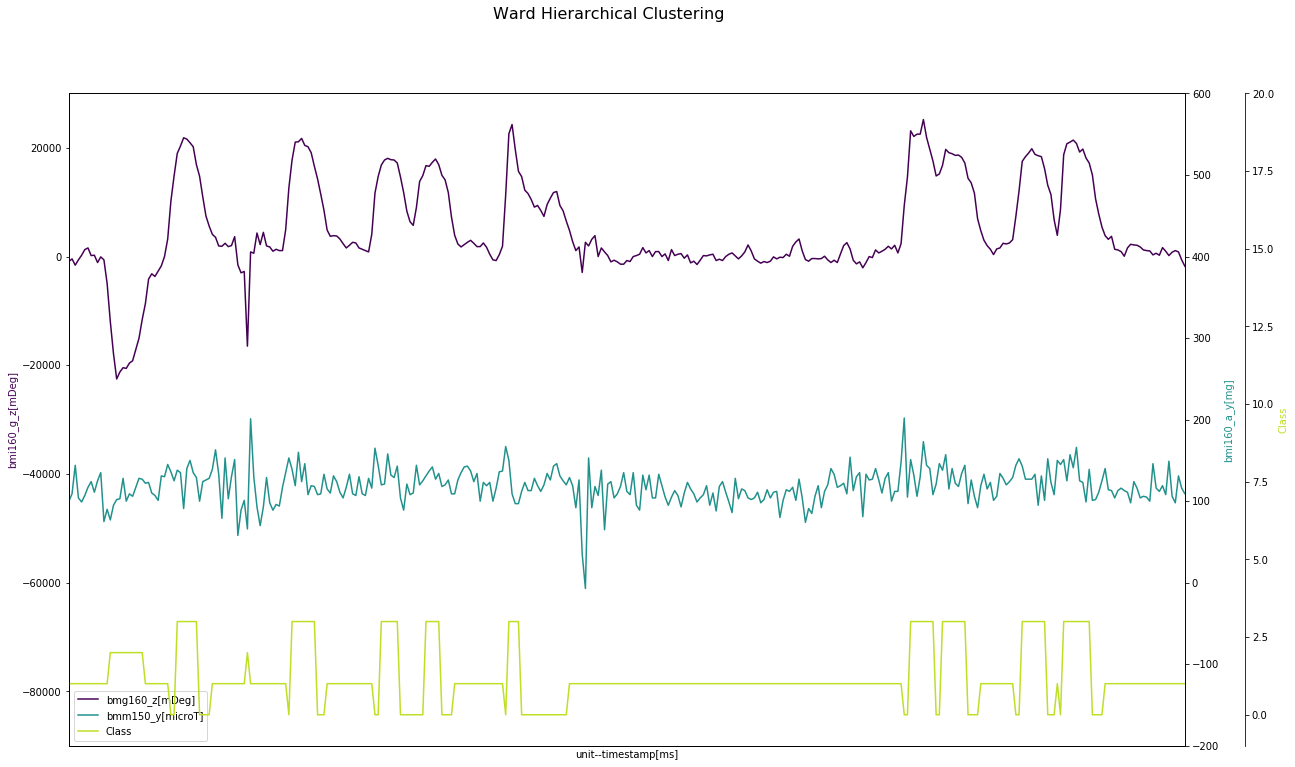

In [24]:
se = pd.Series(Kclass_LR3)
df_LR3['Class'] = se.values

x3 = df_LR3["Class"].values
x4 = df_LR3[" unit--timestamp[ms]"].values

fig = plt.figure(figsize=(20,12))
host = fig.add_subplot(111)

plt.suptitle("Ward Hierarchical Clustering", fontsize=16)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlim(135000, 205000)
host.set_ylim(-90000, 30000)
par1.set_ylim(-200, 600)
par2.set_ylim(-1, 20)

host.set_xlabel("unit--timestamp[ms]")
host.set_ylabel("bmi160_g_z[mDeg]")
par1.set_ylabel("bmi160_a_y[mg]")
par2.set_ylabel("Class")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(.9)

p1, = host.plot(x4, x1, color=color1,label="bmg160_z[mDeg]")
p2, = par1.plot(x4, x2, color=color2, label="bmm150_y[microT]")
p3, = par2.plot(x4, x3, color=color3, label="Class")

lns = [p1, p2, p3]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))      
# no x-ticks                 
par2.xaxis.set_ticks([])
# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

#### (iv) Get Lap Timings

In [25]:
se = pd.Series(Kclass_LR3)
if 'Class' in df_LR3.columns: df_LR3.drop('Class', axis=1)
df_LR3['Class'] = se.values

ls1 = df_LR3.loc[df_LR3['Class'] == 3].index.tolist()

ls2 = df_LR3.loc[df_LR3['Class'] == 2].index.tolist()

ls = sorted(ls1 + ls2)
#print(ls)

listClasses= []
for i, value in enumerate(ls):
    if(i != len(ls) - 1):
        if(value != ls[i-1] + 1):
            if(ls[i+1] == value + 1):
                listClasses.append(value)

segment_timings_tmp = [(x - listClasses[i-1])*0.2 if i else None for i, x in enumerate(listClasses)][1:]
segment_timings_LR3 = ["{:.2f}".format(value) for value in segment_timings_tmp]

segment_timings_label_tmp = ["L" + str(loop) + "S" + str(segment) for loop in range(1,math.ceil(len(segment_timings_LR3)/10)) for segment in range(1,11)]
segment_timings_label = segment_timings_label_tmp[0:len(segment_timings_LR2)]

loop_timings_tmp = np.add.reduceat(segment_timings_tmp, np.arange(0, len(segment_timings_tmp), 10))
loop_timings_LR3 = ["{:.2f}".format(value) for value in loop_timings_tmp]

df_timings_LR3 = pd.DataFrame(list(zip(segment_timings_label, segment_timings_LR3)),
              columns=['Loop/Segment','Segment Timing'])

print(loop_timings_LR3)

df_LR3.to_csv("DataSet/LOG_0003_clustered.csv", sep=',')
df_timings_LR3.to_csv("DataSet/LOG_0003_timings.csv", sep=',')

['71.80', '72.40', '72.60', '73.00', '73.00', '73.60', '73.40', '73.00', '73.40', '47.40']


## 3. Time Series Analysis

### (a) Plot Timing

#### (i) Training Dataset

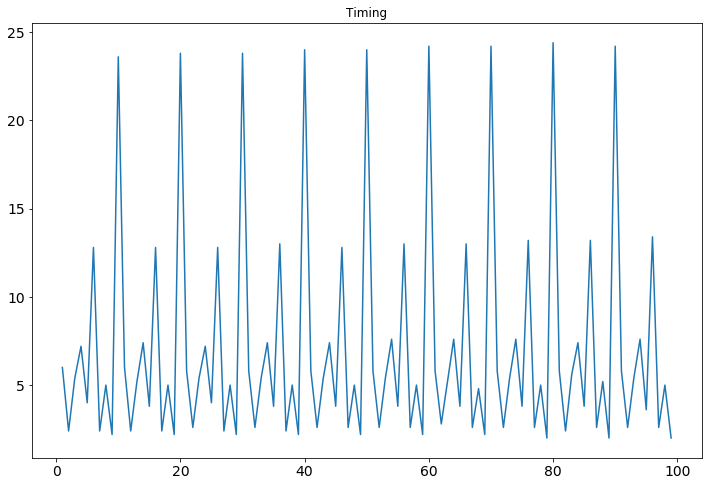

In [26]:
# Load dataset
LR1_timing = [float(i) for i in segment_timings_LR1]

x = [i for i in range(1,len(LR1_timing)+1)]

df_LR1_Timing = pd.DataFrame(list(zip(LR1_timing)),
              columns=['Timing'])
df_LR1_Timing['index'] = x
df_LR1_Timing.set_index(['index'], inplace=True)
df_LR1_Timing.index.name=None
df_LR1_Timing.columns= ['Timing']
df_LR1_Timing.Timing.plot(figsize=(12,8), title= 'Timing', fontsize=14)

#### (ii) Validation Dataset

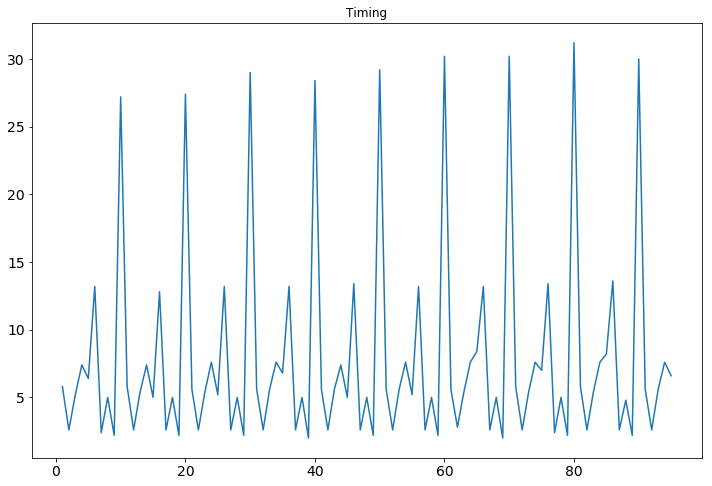

In [27]:
# Load dataset
LR2_timing = [float(i) for i in segment_timings_LR2]

x = [i for i in range(1,len(LR2_timing)+1)]

df_LR2_Timing = pd.DataFrame(list(zip(LR2_timing)),
              columns=['Timing'])
df_LR2_Timing['index'] = x
df_LR2_Timing.set_index(['index'], inplace=True)
df_LR2_Timing.index.name=None
df_LR2_Timing.columns= ['Timing']
df_LR2_Timing.Timing.plot(figsize=(12,8), title= 'Timing', fontsize=14)

### (b) Plot Distribution

#### (i) Histogram

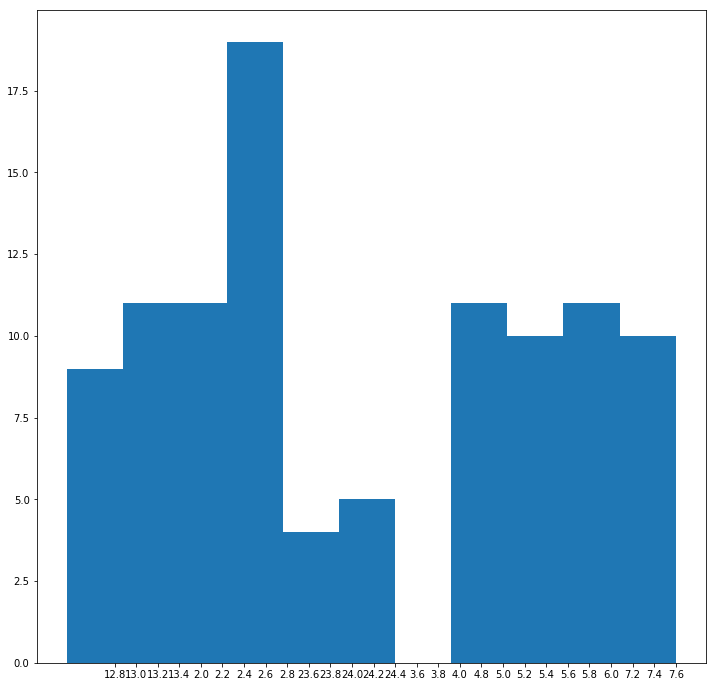

In [28]:
# histogram plot
plt.hist(df_LR1_Timing)
plt.show()

#### (ii) Seasonal Decomposition

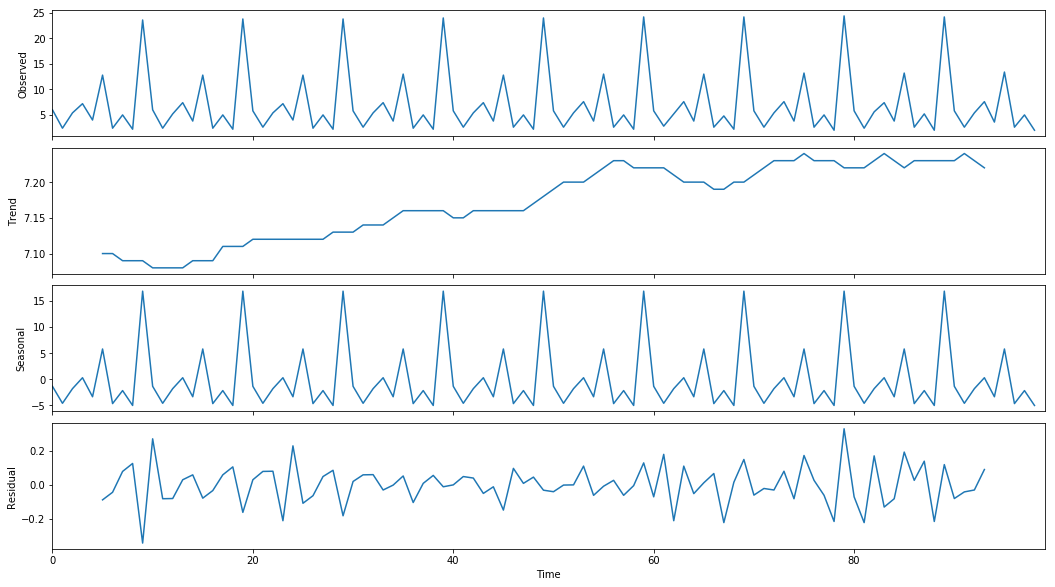

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(LR1_timing, freq=10)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

#### (iii) Test for Stationarity of Time Series

In [30]:
# statistical test for the stationarity of the time series
from pandas import Series
from statsmodels.tsa.stattools import adfuller

# create a differenced time series
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return Series(diff)

X = df_LR1_Timing.Timing.values

# Non-differenced data
nonstationary = Series(list(X))
nonstationary.index = df_LR1_Timing.index[0:]
# check if stationary
result = adfuller(nonstationary)
print('Non-Differenced Data Result:')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

print('')

# difference data
stationary = difference(X)
stationary.index = df_LR1_Timing.index[1:]
# check if stationary
result = adfuller(stationary)
print('Differenced Data Result:')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

Non-Differenced Data Result:
ADF Statistic: -1.423053
p-value: 0.571176
Critical Values:
	1%: -3.509
	5%: -2.896
	10%: -2.585

Differenced Data Result:
ADF Statistic: -14.683308
p-value: 0.000000
Critical Values:
	1%: -3.507
	5%: -2.895
	10%: -2.585


#### (iv) ACF and PACF plots of time series

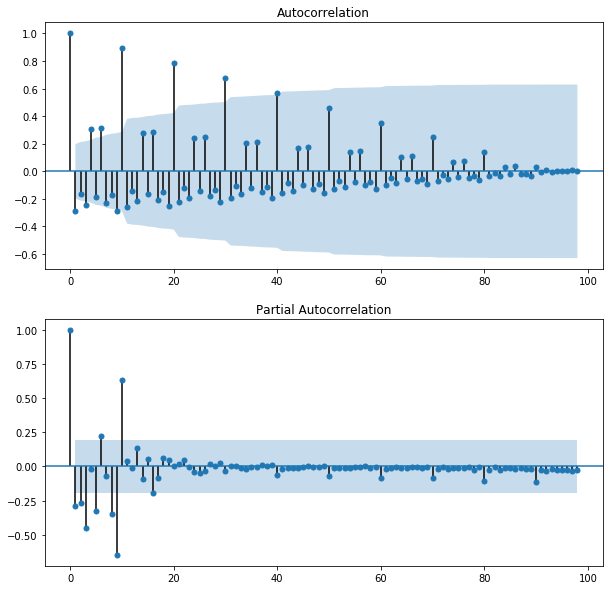

In [31]:
# ACF and PACF plots of time series
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
pyplot.figure()
pyplot.subplot(211)
plot_acf(df_LR1_Timing.Timing, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(df_LR1_Timing.Timing, ax=pyplot.gca())
pyplot.show()

Looking at the ACF and PACF plots of the differenced series we see our first significant value at lag 0 for ACF and at the same lag 0 for the PACF which suggest to use p = 0 and q = 0. We also have a big value at lag 10 in the ACF plot which suggests our season is S = 10 and since this lag is positive it suggests P = 1 and Q = 0. Since this is a differenced series for SARIMA we set d = 1, and since the seasonal pattern is not stable over time we set D = 0. All together this gives us a SARIMA(0,1,0)(1,0,0)[10] model. Next we run SARIMA with these values to fit a model on our training data.

#### (v) Perform SARIMAX time series analysis

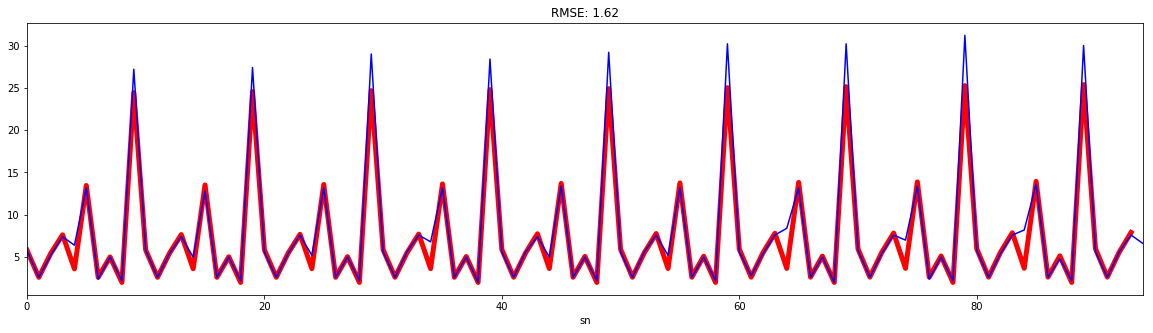

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.stats.api as sms
import numpy as np, scipy.stats as st

X = df_LR1_Timing.Timing.values

X2 = df_LR2_Timing.Timing.values

train_size = int(len(X))
train, test = X[0:train_size], X[0:train_size]

model = SARIMAX(train, order=(0,1,0), seasonal_order=(1,0,0,10), 
                enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit(disp=False) #Extract the fitted model

forecast = model_fit.forecast(len(test))

test = X2[:-1]

forecast = np.delete(forecast, 0)
forecast = forecast[:len(test)]

# Plot forecast results and display RMSE
plt.figure(figsize=(20,5))
plt.plot(forecast, 'r', lw=5)
plt.plot(X2, 'b')
plt.title('RMSE: %.2f' % np.sqrt(sum((forecast-test)**2)/len(X)))
plt.xlabel('sn')
plt.ylabel('')
plt.autoscale(enable=True, axis='x', tight=True)

fmt = '{:<8}{:<20}{}'

#print(fmt.format('', 'X2', 'forecast'))
#for i, (a, b) in enumerate(zip(X2, forecast)):
#    print(fmt.format(i, a, b))

## 4. Classification Analysis

In [33]:
# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import sys
import warnings
from IPython.display import Markdown, display

if not sys.warnoptions:
    warnings.simplefilter("ignore")

### (a) Split-out validation dataset

In [34]:
# Standardize the clustering labels generated by the models
# 0 - Unknown, 1 - Straight, 2 - Left, 3 - Right
df_LR2[['Class']] = df_LR2[['Class']].replace([3, 1, 0, 2], [0, 1, 2, 3])

array = df_LR1.values
X = array[:,0:21]
Y = array[:,21]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split (X, Y, test_size=validation_size,
random_state=seed)

### (b) Test options and evaluation metric

In [35]:
num_folds = 10
seed = 7
scoring = 'accuracy'

### (c) Spot-Check Algorithms

**Algorithm results on raw data**

LR: 0.890082 (0.024944)
LDA: 0.956098 (0.007420)
SVC: 0.618307 (0.028134)
KNN: 0.884045 (0.022487)
GaussianNB: 0.936325 (0.011990)
DecisionTree: 0.999666 (0.001003)


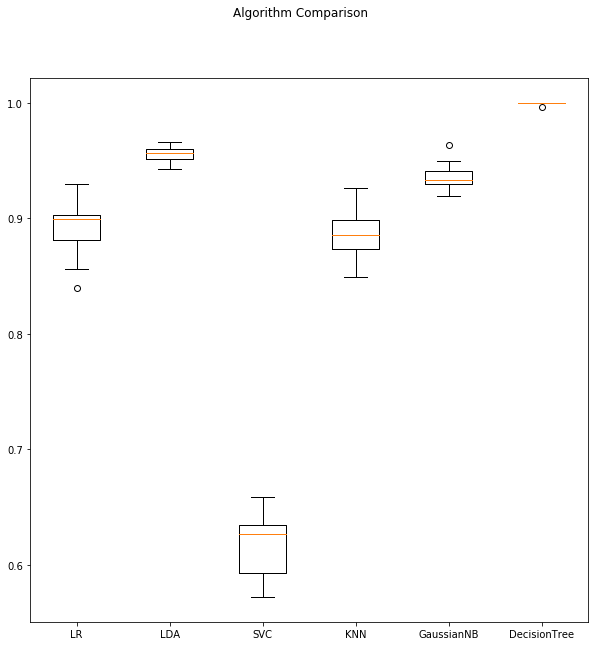

In [36]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('SVC', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('DecisionTree', DecisionTreeClassifier()))
results = []
names = []

display(Markdown("**Algorithm results on raw data**"))
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

From the results above, it is observed that Decision Tree Classifier is the outperformer amongst other algorithms.

### (d) Compare Algorithms

In [37]:
scalingMethods = [StandardScaler(), Normalizer(), MinMaxScaler(feature_range=(0, 1)), Binarizer(threshold=0.0)]
scalingMethodNames = ["Standardized", "Normalized", "Rescaled", "Binarized"]

for i, scalingMethod in enumerate(scalingMethods):
    # Standardise the dataset
    pipelines = []
    pipelines.append(('LR', Pipeline([('Scaler', scalingMethod),('LR', LogisticRegression())])))
    pipelines.append(('LDA', Pipeline([('Scaler', scalingMethod),('LDA',LinearDiscriminantAnalysis())])))
    pipelines.append(('SVC', Pipeline([('Scaler', scalingMethod),('SVC', SVC())])))
    pipelines.append(('KNN', Pipeline([('Scaler', scalingMethod),('KNN', KNeighborsClassifier())])))
    pipelines.append(('GaussianNB', Pipeline([('Scaler', scalingMethod),('GaussianNB', GaussianNB())])))
    pipelines.append(('DecisionTree', Pipeline([('Scaler', scalingMethod),('DecisionTree', DecisionTreeClassifier())])))
    results = []
    names = []
    display(Markdown("**Algorithm results on %s Data**" % scalingMethodNames[i]))
    for name, model in pipelines:
        kfold = KFold(n_splits=num_folds, random_state=seed)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    
    # Compare Algorithms
    #fig = pyplot.figure()
    #fig.suptitle('Algorithm Comparison')
    #ax = fig.add_subplot(111)
    #pyplot.boxplot(results)
    #ax.set_xticklabels(names)
    #pyplot.show()

**Algorithm results on Standardized Data**

LR: 0.858899 (0.032855)
LDA: 0.956098 (0.007420)
SVC: 0.962468 (0.011101)
KNN: 0.930302 (0.017797)
GaussianNB: 0.937331 (0.011890)
DecisionTree: 0.999666 (0.001003)


**Algorithm results on Normalized Data**

LR: 0.686000 (0.029940)
LDA: 0.853221 (0.023489)
SVC: 0.618307 (0.028134)
KNN: 0.917220 (0.019336)
GaussianNB: 0.872654 (0.029055)
DecisionTree: 0.967166 (0.013279)


**Algorithm results on Rescaled Data**

LR: 0.832098 (0.030388)
LDA: 0.956098 (0.007420)
SVC: 0.908503 (0.021331)
KNN: 0.934652 (0.013501)
GaussianNB: 0.937331 (0.011890)
DecisionTree: 0.999666 (0.001003)


**Algorithm results on Binarized Data**

LR: 0.722180 (0.030161)
LDA: 0.705774 (0.025327)
SVC: 0.716819 (0.026422)
KNN: 0.700095 (0.025997)
GaussianNB: 0.540216 (0.026118)
DecisionTree: 0.733583 (0.022360)


From the results above, it is observed that Decision Tree Classifier is the outperformer amongst other algorithms whether on raw, standardized, normalized, rescaled or binarized data.

### (e) Estimate accuracy on validation dataset

In [64]:
# Create a validation dataset

algos = [DecisionTreeClassifier()]
scalingMethods = [StandardScaler(), Normalizer(), MinMaxScaler(feature_range=(0, 1)), Binarizer(threshold=0.0)]
algoNames = ["DecisionTree"]
scalingMethodNames = ["Standardized", "Normalized", "Rescaled", "Binarized"]

display(Markdown("**Accuracy Estimation of %s on validation dataset**" % algoNames[0]))

# Transformed Data
for i, scalingMethod in  enumerate(scalingMethods): 
    for j, algo in enumerate(algos):
        model = algo 
        scaler = scalingMethod.fit(X_train)
        rescaledTrainX = scaler.transform(X_train)
        model.fit(rescaledTrainX, Y_train)

        scaler = scalingMethod.fit(X_validation)
        rescaledValidationX = scaler.transform(X_validation)

        predictions = model.predict(rescaledValidationX)
        print(str(scalingMethodNames[i]) + ": " + str(accuracy_score(Y_validation, predictions)))
    print("")

**Accuracy Estimation of DecisionTree on validation dataset**

Standardized: 0.9973226238286479

Normalized: 0.9544846050870147

Rescaled: 0.9049531459170014

Binarized: 0.7041499330655957



From the results above, it is observed that Decision Tree Classifier performs the best on a copy of the standardized validation dataset

### (f) Algorithm Tuning

In [39]:
# Decision Tree Classifier Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
maxDepth_values = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
param_grid = dict(max_depth=maxDepth_values)
model = DecisionTreeClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.999665 using {'max_depth': 2}
0.820710 (0.025099) with: {'max_depth': 1}
0.999665 (0.001004) with: {'max_depth': 2}
0.999665 (0.001004) with: {'max_depth': 3}
0.999665 (0.001004) with: {'max_depth': 4}
0.999665 (0.001004) with: {'max_depth': 5}
0.999665 (0.001004) with: {'max_depth': 6}
0.999665 (0.001004) with: {'max_depth': 7}
0.999665 (0.001004) with: {'max_depth': 8}
0.999665 (0.001004) with: {'max_depth': 9}
0.999665 (0.001004) with: {'max_depth': 10}
0.999665 (0.001004) with: {'max_depth': 11}
0.999665 (0.001004) with: {'max_depth': 12}


From the results above, max_depth parameter set to 2 produces the best results for Decision Tree Classifier

### (g) Ensembles


In [53]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

scalingMethods = [StandardScaler(), Normalizer(), MinMaxScaler(feature_range=(0, 1)), Binarizer(threshold=0.0)]
scalingMethodNames = ["Standardized", "Normalized", "Rescaled", "Binarized"]

#### (i) Spot Check Algorithms

**Algorithm results on raw data**

AdaBoost: 0.999666 (0.001003)
GradientBoosting: 0.999666 (0.001003)
RandomForest: 0.997657 (0.002143)
ExtraTrees: 0.989282 (0.008947)
Bagging: 0.960781 (0.025174)
Votting: 0.985258 (0.008359)


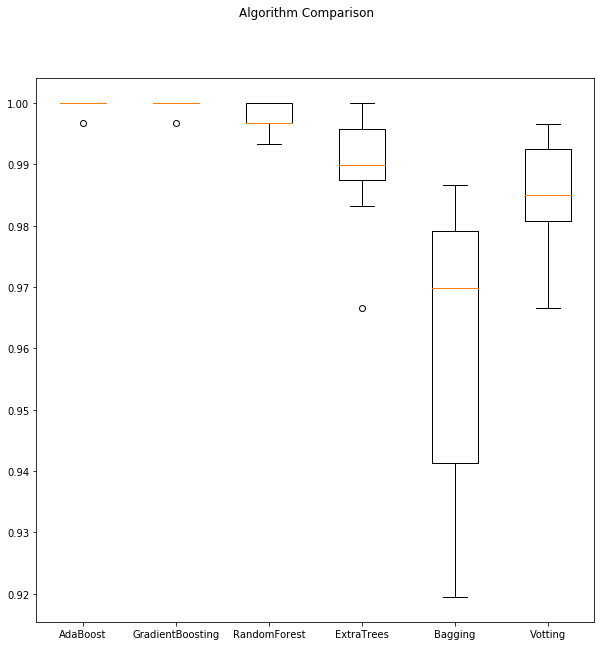

In [52]:
models = []
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('GradientBoosting', GradientBoostingClassifier()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('ExtraTrees', ExtraTreesClassifier()))
models.append(('Bagging', BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5)))
models.append(('Votting', VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')))
results = []
names = []

display(Markdown("**Algorithm results on raw data**"))
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

#### (ii) Compare Algorithms

In [40]:
for i, scalingMethod in enumerate(scalingMethods):
    display(Markdown("**Algorithm results on %s Data**" % scalingMethodNames[i]))
    # ensembles
    ensembles = []
    ensembles.append(('AdaBoost', Pipeline([('Scaler', scalingMethod),('AdaBoost',
    AdaBoostClassifier())])))
    ensembles.append(('GradientBoosting', Pipeline([('Scaler', scalingMethod),('GradientBoosting',
    GradientBoostingClassifier())])))
    ensembles.append(('RandomForest', Pipeline([('Scaler', scalingMethod),('RandomForest',
    RandomForestClassifier())])))
    ensembles.append(('ExtraTree', Pipeline([('Scaler', scalingMethod),('ExtraTrees',
    ExtraTreesClassifier())])))
    ensembles.append(('Bagging', Pipeline([('Scaler', StandardScaler()),('Bagging',
    BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5))])))
    ensembles.append(('Votting', Pipeline([('Scaler', StandardScaler()),('Votting',
    VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard'))])))

    results = []
    names = []

    for name, model in ensembles:
        kfold = KFold(n_splits=num_folds, random_state=seed)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    print("")

**Algorithm results on Standardized Data**

AdaBoost: 0.999666 (0.001003)
GradientBoosting: 0.999666 (0.001003)
RandomForest: 0.997321 (0.003907)
ExtraTree: 0.986934 (0.005877)
Bagging: 0.922259 (0.017303)
Votting: 0.968499 (0.012729)



**Algorithm results on Normalized Data**

AdaBoost: 0.878013 (0.036051)
GradientBoosting: 0.977553 (0.008728)
RandomForest: 0.966159 (0.011443)
ExtraTree: 0.968168 (0.009499)
Bagging: 0.929282 (0.012789)
Votting: 0.968499 (0.012729)



**Algorithm results on Rescaled Data**

AdaBoost: 0.999666 (0.001003)
GradientBoosting: 0.999666 (0.001003)
RandomForest: 0.997992 (0.003411)
ExtraTree: 0.985927 (0.007610)
Bagging: 0.928947 (0.018480)
Votting: 0.968499 (0.012729)



**Algorithm results on Binarized Data**

AdaBoost: 0.672933 (0.028642)
GradientBoosting: 0.732578 (0.022330)
RandomForest: 0.730571 (0.024873)
ExtraTree: 0.733248 (0.020629)
Bagging: 0.926604 (0.017839)
Votting: 0.968499 (0.012729)



From the results above, it is observed that AdaBoost and Gradient Boosting provides the best amongst all evaluated algorithms.

#### (iii) Estimate accuracy on validation dataset

In [56]:
ensembles = [AdaBoostClassifier(), GradientBoostingClassifier()]
ensembleNames = ["AdaBoost", "GradientBoosting"]

scalingMethodNames[i]

for i, algo in enumerate(ensembles):
    display(Markdown("**Accuracy Estimation of %s on validation dataset**" % ensembleNames[i]))
    for j, scalingMethod in  enumerate(scalingMethods):
        model = algo
        scaler = scalingMethod.fit(X_train)
        rescaledTrainX = scaler.transform(X_train)
        model.fit(rescaledTrainX, Y_train)        
        
        scaler = scalingMethod.fit(X_validation)
        rescaledValidationX = scaler.transform(X_validation)
        predictions = model.predict(rescaledValidationX)

        print(str(scalingMethodNames[j]) + ": " + str(accuracy_score(Y_validation, predictions)))
    print("")

**Accuracy Estimation of AdaBoost on validation dataset**

Standardized: 0.9973226238286479
Normalized: 0.9089692101740294
Rescaled: 0.9049531459170014
Binarized: 0.6519410977242303



**Accuracy Estimation of GradientBoosting on validation dataset**

Standardized: 0.9973226238286479
Normalized: 0.9772423025435074
Rescaled: 0.9049531459170014
Binarized: 0.7081659973226239



From the results above, it is observed that AdaBoost and Gradient Boosting performs the best on a copy of the standardized validation dataset

#### (iv) Algorithm Tuning

In [42]:
# Tune scaled Gradient Boosting
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.999665 using {'n_estimators': 50}
0.999665 (0.001004) with: {'n_estimators': 50}
0.999665 (0.001004) with: {'n_estimators': 100}
0.999665 (0.001004) with: {'n_estimators': 150}
0.999665 (0.001004) with: {'n_estimators': 200}
0.999665 (0.001004) with: {'n_estimators': 250}
0.999665 (0.001004) with: {'n_estimators': 300}
0.999665 (0.001004) with: {'n_estimators': 350}
0.999665 (0.001004) with: {'n_estimators': 400}


In [43]:
# AdaBoost Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {
    'n_estimators': [50, 60, 70, 80, 90, 100],
    'learning_rate': [0.1, 0.5, 1.0, 2.0]
}
model = AdaBoostClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.999665 using {'learning_rate': 0.1, 'n_estimators': 90}
0.951743 (0.057367) with: {'learning_rate': 0.1, 'n_estimators': 50}
0.990282 (0.013342) with: {'learning_rate': 0.1, 'n_estimators': 60}
0.997319 (0.006989) with: {'learning_rate': 0.1, 'n_estimators': 70}
0.997319 (0.006989) with: {'learning_rate': 0.1, 'n_estimators': 80}
0.999665 (0.001004) with: {'learning_rate': 0.1, 'n_estimators': 90}
0.999665 (0.001004) with: {'learning_rate': 0.1, 'n_estimators': 100}
0.999665 (0.001004) with: {'learning_rate': 0.5, 'n_estimators': 50}
0.999665 (0.001004) with: {'learning_rate': 0.5, 'n_estimators': 60}
0.999665 (0.001004) with: {'learning_rate': 0.5, 'n_estimators': 70}
0.999665 (0.001004) with: {'learning_rate': 0.5, 'n_estimators': 80}
0.999665 (0.001004) with: {'learning_rate': 0.5, 'n_estimators': 90}
0.999665 (0.001004) with: {'learning_rate': 0.5, 'n_estimators': 100}
0.999665 (0.001004) with: {'learning_rate': 1.0, 'n_estimators': 50}
0.999665 (0.001004) with: {'learning_

### (h) Finalize Model

#### (i) Prepare/ Save Model

In [82]:
from pickle import dump
from pickle import load

# Prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = AdaBoostClassifier(n_estimators=90, learning_rate=0.1)
model.fit(rescaledX, Y_train)

# Save the model to disk
filename = 'model_AutonomousRobot.pkl'
dump(model, open(filename, 'wb'))

#### (ii) Load Model/ Test

In [84]:
#load the model from disk
model = load(open(filename, 'rb'))

array = df_LR2.values
X = array[:,0:21]
Y = array[:,21]

# transform the validation dataset
rescaledValidationX = scaler.transform(X)
predictions = model.predict(rescaledValidationX)

pred_score = accuracy_score(Y, predictions)
conf_mx = confusion_matrix(Y, predictions)
class_rpt = classification_report(Y, predictions)

display(Markdown("**Accuracy Classification Score:**"))
print(pred_score)
display(Markdown("**Confusion Matrix:**"))
print(conf_mx)
display(Markdown("**Classification Report:**"))
print(class_rpt)


**Accuracy Classification Score:**

0.9403312226010716


**Confusion Matrix:**

[[ 352    0    0    0]
 [ 111 2685    0    0]
 [ 115    0  712    0]
 [   0   19    0  112]]


**Classification Report:**

             precision    recall  f1-score   support

          0       0.61      1.00      0.76       352
          1       0.99      0.96      0.98      2796
          2       1.00      0.86      0.93       827
          3       1.00      0.85      0.92       131

avg / total       0.96      0.94      0.95      4106

